In [5]:
import os
import torch
import imageio
import torchvision

from torch.utils.data import Dataset

from torchvision import transforms

from sklearn.model_selection import train_test_split

from PIL import Image

import torchvision.transforms as T

import matplotlib.pyplot as plt
import numpy as np
from torcheval.metrics.functional import multiclass_f1_score as f1_score

from torch.optim.lr_scheduler import StepLR


In [6]:
import torchvision.transforms as transforms
import torchvision.models as models

In [7]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [8]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [9]:
models

<module 'torchvision.models' from 'C:\\Users\\drago\\anaconda3\\envs\\py312_ITS365\\Lib\\site-packages\\torchvision\\models\\__init__.py'>

In [10]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [11]:

## !pip install torchvision


In [12]:

torch.cuda.is_available()


True

In [13]:

torch.cuda.device_count()


1

In [14]:

torch.cuda.current_device()


0

In [15]:

torch.cuda.get_device_name(0)


'NVIDIA GeForce RTX 4070 Ti SUPER'


## Assign device


In [16]:

torch_device = torch.device("cpu")

if torch.cuda.is_available(): 
    torch_device = torch.device("cuda")


In [17]:

torch_device


device(type='cuda')


## CIFAR10 DATA


In [18]:

raw_data_train = 'C:/Users/drago/Desktop/CIFAR-10-images-master/train/'

raw_data_test  = 'C:/Users/drago/Desktop/CIFAR-10-images-master/test/'



## PATH to checkpoint


In [19]:

PATH = "./CNN_Model_CIFAR10"




## Train data


In [20]:

dataset_train = []
labels_train  = []
targets_train = []


In [21]:

for folder in sorted( os.listdir( raw_data_train ) ):
    ## print(folder)
    for image in sorted(os.listdir( os.path.join(raw_data_train, folder) )):
        if folder not in labels_train:
            labels_train.append( folder )
        targets_train.append(  labels_train.index(folder)  )
        img_arr = imageio.imread(  os.path.join(raw_data_train, folder, image), pilmode="RGB"  )
        
        img_pil = Image.fromarray(img_arr)
        img_resized = transforms.Resize((96, 96))(img_pil)
        img_tensor = transforms.ToTensor()(img_resized)
        dataset_train.append(img_tensor)


        

C:\Users\drago\AppData\Local\Temp\ipykernel_25648\1617728772.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(  os.path.join(raw_data_train, folder, image), pilmode="RGB"  )


In [22]:

len(labels_train)


10

In [23]:

len( targets_train )


50000

In [24]:

dataset_train[3].shape


torch.Size([3, 96, 96])

In [25]:

data_train    = torch.stack( dataset_train )
targets_train = torch.Tensor(  targets_train  ).type(   torch.LongTensor   )

torch.save(   (data_train, targets_train, labels_train), "InClass_CIFAR10_data"     )

## data1, targets1, labels1 = torch.load("InClass_CIFAR10_data")


In [26]:

data_train.shape


torch.Size([50000, 3, 96, 96])

In [27]:

targets_train.shape


torch.Size([50000])

In [28]:

data_train[4].shape


torch.Size([3, 96, 96])

In [29]:

targets_train[24000:25000]


tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,


## Print images


In [30]:

img_tr = data_train[46000]
img_tr


tensor([[[0.8392, 0.8392, 0.8392,  ..., 0.2706, 0.2627, 0.2627],
         [0.8392, 0.8392, 0.8392,  ..., 0.2706, 0.2627, 0.2627],
         [0.8353, 0.8353, 0.8353,  ..., 0.2588, 0.2549, 0.2549],
         ...,
         [0.2353, 0.2353, 0.2392,  ..., 0.4471, 0.4588, 0.4588],
         [0.2314, 0.2314, 0.2392,  ..., 0.4471, 0.4588, 0.4588],
         [0.2314, 0.2314, 0.2392,  ..., 0.4471, 0.4588, 0.4588]],

        [[0.7529, 0.7529, 0.7529,  ..., 0.2784, 0.2706, 0.2706],
         [0.7529, 0.7529, 0.7529,  ..., 0.2784, 0.2706, 0.2706],
         [0.7451, 0.7451, 0.7490,  ..., 0.2706, 0.2627, 0.2627],
         ...,
         [0.2235, 0.2235, 0.2314,  ..., 0.4235, 0.4353, 0.4353],
         [0.2196, 0.2196, 0.2275,  ..., 0.4235, 0.4353, 0.4353],
         [0.2196, 0.2196, 0.2275,  ..., 0.4235, 0.4353, 0.4353]],

        [[0.5569, 0.5569, 0.5569,  ..., 0.2353, 0.2275, 0.2275],
         [0.5569, 0.5569, 0.5569,  ..., 0.2353, 0.2275, 0.2275],
         [0.5529, 0.5529, 0.5529,  ..., 0.2235, 0.2157, 0.

In [31]:

transform = T.ToPILImage()



In [32]:

img = transform(  img_tr  )


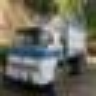

In [33]:

img



## Class balance


In [34]:

y_train_np = targets_train.numpy() 
y_train_np.shape

the_set = np.unique(  y_train_np  )
the_set


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

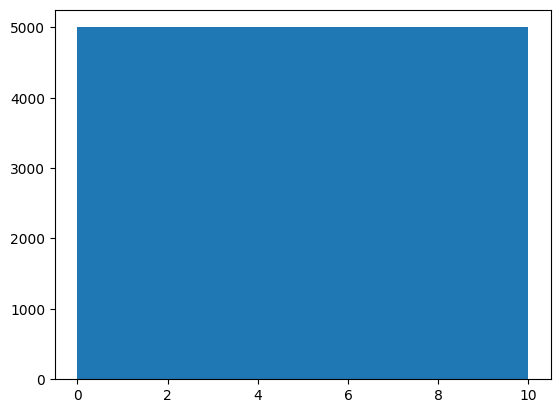

In [35]:

##_ = plt.hist( targets_train.numpy() , bins="auto" )
_ = plt.hist( targets_train.numpy() , bins=range(11))

plt.show()



## Test Data


In [36]:

dataset_test = []
labels_test = []
targets_test = []


In [37]:

for folder in sorted( os.listdir( raw_data_test ) ):
    ## print(folder)
    for image in sorted( os.listdir( os.path.join(raw_data_test, folder) ) ):
        if folder not in labels_test:
            labels_test.append( folder )
        targets_test.append(  labels_test.index(folder)  )
        img_arr = imageio.imread(  os.path.join(raw_data_test, folder, image), pilmode="RGB"  )
        
        img_pil = Image.fromarray(img_arr)
        img_resized = transforms.Resize((96, 96))(img_pil)
        img_tensor = transforms.ToTensor()(img_resized)
        dataset_test.append(img_tensor)


C:\Users\drago\AppData\Local\Temp\ipykernel_25648\4081328021.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(  os.path.join(raw_data_test, folder, image), pilmode="RGB"  )


In [38]:

data_test   = torch.stack( dataset_test )
targets_test = torch.Tensor(  targets_test  ).type(   torch.LongTensor   )

torch.save(   (data_test, targets_test, labels_test), "InClass_CIFAR10_data_test"     )

## data1, targets1, labels1 = torch.load("InClass_CIFAR10_data")


In [39]:

data_test.shape


torch.Size([10000, 3, 96, 96])

In [40]:

targets_test.shape


torch.Size([10000])

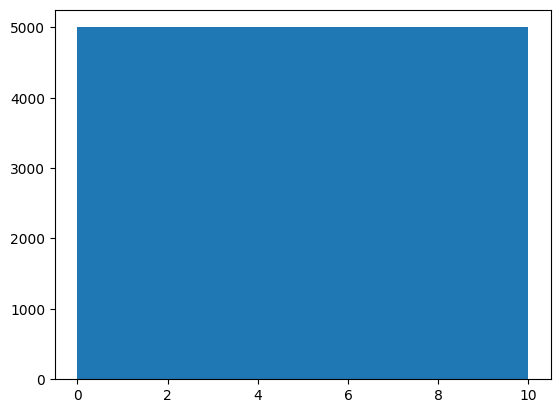

In [41]:

##_ = plt.hist( targets_test.numpy() , bins="auto" )
_ = plt.hist( targets_train.numpy() , bins=range(11 ))

plt.show()


In [42]:

X_train = data_train  
y_train = targets_train


In [43]:

X_test = data_test  
y_test = targets_test 



## Change to float 32


In [44]:

X_train = X_train.numpy()
X_test  = X_test.numpy()


In [45]:

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )


In [46]:

X_train = torch.from_numpy(X_train )
X_test = torch.from_numpy( X_test  )



## Normalize


In [47]:

img_norm_mean = (0.5, 0.5, 0.5)



In [48]:

img_norm_std  = (0.5, 0.5, 0.5)


In [49]:

other_normalization = transforms.Compose([
                            ## transforms.ToTensor(),
                            transforms.Normalize( img_norm_mean, img_norm_std )
])


In [50]:

preprocess = transforms.Compose([
                 transforms.Resize((96, 96)),
                 transforms.ToTensor()
])


In [51]:

X_train = other_normalization( X_train )  

X_test  = other_normalization( X_test ) 



## Print shapes


In [52]:

X_train.shape[0]


50000

In [53]:

y_train[30000].item()
type(y_train[30000].item())


int

In [54]:

y_train[30000].item()


6

In [55]:

 X_train[78]


tensor([[[-0.0431, -0.0431, -0.0431,  ..., -0.0275, -0.0275, -0.0275],
         [-0.0431, -0.0431, -0.0431,  ..., -0.0275, -0.0275, -0.0275],
         [-0.0353, -0.0353, -0.0353,  ..., -0.0353, -0.0353, -0.0353],
         ...,
         [ 0.2392,  0.2392,  0.2157,  ..., -0.1059, -0.1137, -0.1137],
         [ 0.1686,  0.1686,  0.1451,  ..., -0.0902, -0.0588, -0.0588],
         [ 0.1686,  0.1686,  0.1451,  ..., -0.0902, -0.0588, -0.0588]],

        [[ 0.6392,  0.6392,  0.6392,  ...,  0.5922,  0.5922,  0.5922],
         [ 0.6392,  0.6392,  0.6392,  ...,  0.5922,  0.5922,  0.5922],
         [ 0.6471,  0.6471,  0.6471,  ...,  0.5843,  0.5843,  0.5843],
         ...,
         [ 0.3490,  0.3490,  0.3255,  ..., -0.0196, -0.0275, -0.0275],
         [ 0.2784,  0.2784,  0.2549,  ..., -0.0118,  0.0196,  0.0196],
         [ 0.2784,  0.2784,  0.2549,  ..., -0.0118,  0.0196,  0.0196]],

        [[ 0.8745,  0.8745,  0.8745,  ...,  0.8353,  0.8353,  0.8353],
         [ 0.8745,  0.8745,  0.8745,  ...,  0

In [56]:

 CIFAR_train_list = [  ( X_train[i],  y_train[i].item() )  for i in range( X_train.shape[0]   )  ]


In [57]:

 CIFAR_test_list = [  ( X_test[i],  y_test[i].item() )  for i in range( X_test.shape[0]   )  ]



## DataLoader


In [58]:

batch_size = 64  ## 16


In [59]:

train_dl = torch.utils.data.DataLoader( CIFAR_train_list, batch_size=batch_size, shuffle=True  )

In [60]:
test_dl = torch.utils.data.DataLoader( CIFAR_test_list, batch_size=10000, shuffle=True  )



## Architectures


In [61]:

32*32*3


3072

In [62]:

model = models.resnext50_32x4d(weights=models.ResNeXt50_32X4D_Weights.DEFAULT)

model.fc = nn.Linear(model.fc.in_features, 10)

torch.nn.init.xavier_uniform_(model.fc.weight)




model.to(torch_device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [63]:
def mixup_data(x, y, alpha=0.4):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


In [64]:

def training_loop(N_Epochs, model, loss_fn, opt, scheduler=None):
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            xb, yb = xb.to(torch_device), yb.to(torch_device)
            opt.zero_grad()
        
            # MixUp
            mixed_x, y_a, y_b, lam = mixup_data(xb, yb, alpha=0.4)
            pred = model(mixed_x)

            
            loss = lam * loss_fn(pred, y_a) + (1 - lam) * loss_fn(pred, y_b)
            loss.backward()
            opt.step()

        if scheduler:
            scheduler.step()

        if epoch % 5 == 0:
            print(f"{epoch} loss= {loss}")
            print("lr=", opt.param_groups[0]['lr'])
            new_PATH = PATH + str(epoch)
            print(new_PATH)
            torch.save(model, new_PATH)



In [65]:

## torch.save(model, PATH)





## Core functions


In [66]:
      
N_Epochs      = 30
learning_rate = 0.001

#N_Epochs      = 300
#learning_rate = 0.0005

In [67]:

opt = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.0001) 

scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=5, gamma=0.5)
loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)



In [68]:

training_loop(N_Epochs, model, loss_fn, opt, scheduler)


0 loss= 0.6401771903038025
lr= 0.001
./CNN_Model_CIFAR100
5 loss= 1.0047930479049683
lr= 0.0005
./CNN_Model_CIFAR105
10 loss= 0.9171786904335022
lr= 0.00025
./CNN_Model_CIFAR1010
15 loss= 0.5470411777496338
lr= 0.000125
./CNN_Model_CIFAR1015
20 loss= 0.5277794599533081
lr= 6.25e-05
./CNN_Model_CIFAR1020
25 loss= 0.711808443069458
lr= 3.125e-05
./CNN_Model_CIFAR1025


In [69]:

def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

def testing_loop(test_dl, model, device):
    my_f1 = 0.0
    count = 0.0
    with torch.no_grad():
        for x_raw, y_raw in test_dl:
            x_true, y_true = x_raw.to(device), y_raw.to(device)
            _, y_pred = torch.max(model(x_true), dim=1)
            my_f1 += f1_score(y_true, y_pred, num_classes=10)
            count += 1
    return my_f1 / count


In [70]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        
        batch_size = x_real.shape[0]
        
        ## x_real = x_real.view(  (batch_size, -1 ) )
        
        x_real = x_real.to( torch_device )
        
        y_pred = model(  x_real  )
        
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function( y_real, preds.cpu() )

Accuracy: 0.92
Confusion Matrix:
[[950   4  15   4   1   2   4   1  18   1]
 [  7 962   0   2   1   0   0   0   4  24]
 [ 20   0 913  16  18  10  13   8   2   0]
 [  7   2  24 823  28  79  17   7   9   4]
 [  8   1  16  21 922  11  11   9   1   0]
 [  6   2   9  89  19 860   8   6   1   0]
 [  7   0   8  16   6   1 959   0   2   1]
 [  6   0   9  15  17  16   1 935   1   0]
 [ 17   5   2   1   0   1   0   0 972   2]
 [  4  41   1   2   0   0   3   0  13 936]]
Precision: 0.923
Recall: 0.923
F1-measure: 0.923


In [72]:
import torch.onnx
from onnxruntime.quantization import quantize_dynamic, QuantType

model.eval()

dummy_input = torch.randn(1, 3, 96, 96).to(torch_device)

 
torch.onnx.export(
    model,
    dummy_input,
    "cifar10_resnext50.onnx",
    input_names=["input"],
    output_names=["output"],
    dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}},
    opset_version=11
)